In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [2]:
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [47]:
from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [35]:
!pip install lightgbm

### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [6]:
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
xdf = df.drop(['PRICE'], axis=1)
ydf = df.PRICE

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse = cross_val_score(rf, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*neg_mse)
avg_rmse = np.mean(rmse)

print(f'5폴드 교차 검증의 개별 Negative MSE: {np.round(neg_mse,2)}')
print(f'5폴드 교차 검증의 개별 RMSE: {np.round(rmse,2)}')
print(f'5폴드 교차 검증의 평균 RMSE: {np.round(avg_rmse,2)}')

5폴드 교차 검증의 개별 Negative MSE: [ -7.89 -13.06 -20.62 -46.14 -18.81]
5폴드 교차 검증의 개별 RMSE: [2.81 3.61 4.54 6.79 4.34]
5폴드 교차 검증의 평균 RMSE: 4.42


In [46]:
def model(i):
    neg_mse = cross_val_score(i, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-1*neg_mse)
    avg_rmse = np.mean(rmse)
    
    print(f'########## {i} #########')
    print(f'5폴드 교차 검증의 개별 Negative MSE: {np.round(neg_mse,2)}')
    print(f'5폴드 교차 검증의 개별 RMSE: {np.round(rmse,2)}')
    print(f'5폴드 교차 검증의 평균 RMSE: {np.round(avg_rmse,2)}\n')
###########################################################################

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
dc = DecisionTreeRegressor(random_state=0, max_depth=4)
gb = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb = XGBRegressor(n_estimators=1000)
lgb = LGBMRegressor(n_estimators=1000)
# lor = LogisticRegression()   #로지스틱 회귀는 이름만 회귀, 사실 분류모델임

for i in [rf, dc, gb, xgb, lgb]:
    model(i)

########## RandomForestRegressor(n_estimators=1000, random_state=0) #########
5폴드 교차 검증의 개별 Negative MSE: [ -7.89 -13.06 -20.62 -46.14 -18.81]
5폴드 교차 검증의 개별 RMSE: [2.81 3.61 4.54 6.79 4.34]
5폴드 교차 검증의 평균 RMSE: 4.42

########## DecisionTreeRegressor(max_depth=4, random_state=0) #########
5폴드 교차 검증의 개별 Negative MSE: [-11.94 -36.25 -29.63 -47.23 -58.12]
5폴드 교차 검증의 개별 RMSE: [3.46 6.02 5.44 6.87 7.62]
5폴드 교차 검증의 평균 RMSE: 5.88

########## GradientBoostingRegressor(n_estimators=1000, random_state=0) #########
5폴드 교차 검증의 개별 Negative MSE: [ -7.51 -14.69 -18.34 -39.45 -17.27]
5폴드 교차 검증의 개별 RMSE: [2.74 3.83 4.28 6.28 4.16]
5폴드 교차 검증의 평균 RMSE: 4.26

########## XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
    

<AxesSubplot:>

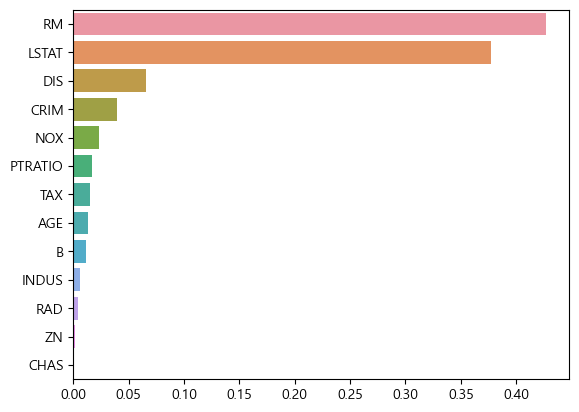

In [41]:
rg = RandomForestRegressor(n_estimators=1000)
rf.fit(xdf, ydf)
features = pd.Series(data=rf.feature_importances_, index=xdf.columns)
features = features.sort_values(ascending=False)
sns.barplot(x=features, y=features.index)

In [49]:
lr = LinearRegression()
dcr2 = DecisionTreeRegressor(max_depth=2)
dcr7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트 생성(4.5~8.5, 0.04간격으로 100개)
xtest = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

xdf = df['RM'].values.reshape(-1,1)
ydf = df['PRICE'].values.reshape(-1,1)

# 학습 및 예측
lr.fit(xdf, ydf)
dcr2.fit(xdf, ydf)
dcr7.fit(xdf, ydf)

pred_lr = lr.predict(xtest)
pred_dcr2 = dcr2.predict(xtest)
pred_dcr7 = dcr7.predict(xtest)

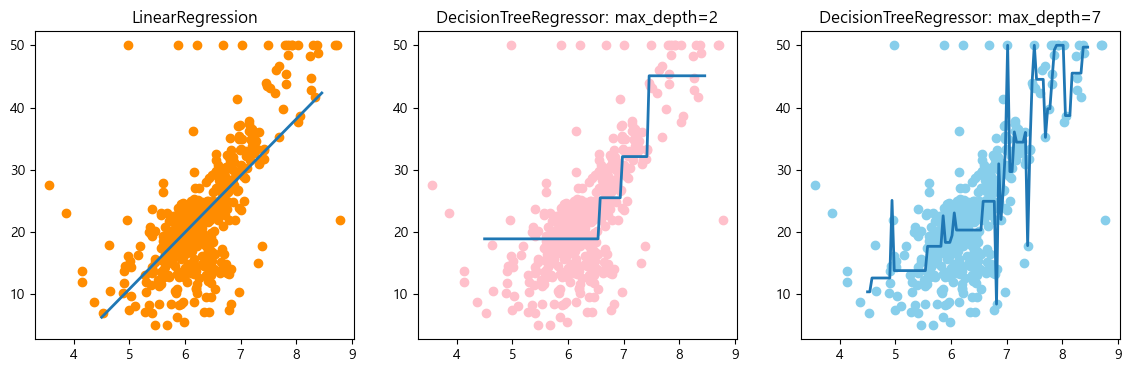

In [53]:
# x축 값을 4.5~8.5로 변환해가며 입력했을 때
# 선형회귀 / 결정트리회귀 예측선 시각화
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# 선형회귀: 직선으로 예측 회귀선 표현
ax1.set_title('LinearRegression')
ax1.scatter(df.RM, df.PRICE, c='darkorange')
ax1.plot(xtest, pred_lr, label='linear', linewidth=2)

# 회귀트리: 분할되는 데이터 지점에 따라 계단 형태로 회귀선 표현
ax2.set_title('DecisionTreeRegressor: max_depth=2')
ax2.scatter(df.RM, df.PRICE, c='pink')
ax2.plot(xtest, pred_dcr2, label='max_depth=2', linewidth=2)

ax3.set_title('DecisionTreeRegressor: max_depth=7')  #과적합 -> 이상치까지 학습, 복잡한 회귀선
ax3.scatter(df.RM, df.PRICE, c='skyblue')
ax3.plot(xtest, pred_dcr7, label='max_depth=7', linewidth=2)